In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('./data/house_data.csv', low_memory=False)
data.head()

,URL,Adresse,Year build,Pris,Type,Energimærke,Ejerudgift,Boligydelse,Anvendelse,Boligtype,...,Kommunal ejerlav navn,Grundstørrelse,Lands ejerlav kode,Vejareal,Lands ejerlav navn,Primær matrikel,Ejendomsnummer,Kommunal ejerlav kode,Ejendomsværdiskat,Grundskyld
0,https://www.boliga.dk/bolig/1729830/krebsen_78...,Krebsen 78 5700 Svendborg,2006,225000,Andelsbolig,C,NaN,6717,Række kæde eller dobbelthus lodret adskillelse...,Egentlig beboelseslejlighed boligenhed med ege...,...,EGENSE BY EGENS,7221.0,430451.0,0.0,EGENSE BY EGENSE,J,194920.0,19.0,0.0,0.0
1,https://www.boliga.dk/bolig/1729730/fiskeparke...,Fiskeparken 25 Snaptun 7130 Juelsminde,2000,295000,Andelsbolig,C,NaN,6374,Fritliggende enfamiliehus,Egentlig beboelseslejlighed boligenhed med ege...,...,ØSTRUP BY GLUD,9924.0,1100452.0,245.0,ØSTRUP BY GLUD,J,16078.0,160.0,0.0,0.0
2,https://www.boliga.dk/bolig/1729667/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.boliga.dk/bolig/1729849/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.boliga.dk/bolig/1729668/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Sorts only ejerlejligheder
data = data[data['Type']=='Ejerlejlighed']


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4553 entries, 19 to 38531
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   URL                          4553 non-null   object 
 1   Adresse                      4553 non-null   object 
 2   Year build                   4553 non-null   object 
 3   Pris                         4553 non-null   object 
 4   Type                         4553 non-null   object 
 5   Energimærke                  4320 non-null   object 
 6   Ejerudgift                   4553 non-null   object 
 7   Boligydelse                  0 non-null      object 
 8   Anvendelse                   4553 non-null   object 
 9   Boligtype                    4553 non-null   object 
 10  Enhedsareal                  4553 non-null   object 
 11  Beboelsesareal               4553 non-null   object 
 12  Værelser                     4553 non-null   float64
 13  Antal toiletter 

In [4]:
#drops all the data we will not need (note we will need ejerudgift when working with ejerlejlighed, therefore boligydelse will be dropped)
data.drop([
    'Vejareal',
    'Lands ejerlav kode',
    'Kommunal ejerlav kode',
    'Ejendomsnummer',
    'Primær matrikel',
    'Lands ejerlav navn',
    'Kommunal ejerlav navn',
    'Matrikelnummer',
    'Afvigende etager',
    'Boligstørrelse tinglyst',
    'Objekt status',
    'Boligstørrelse BBR',
    'Boligstørrelse',
    'Bygningsnummer',
    'Beboelsesareal',
    'URL',
    'Carport',
    'Boligydelse',
    'Anvendelse',
    'Type'
], 'columns', inplace=True)

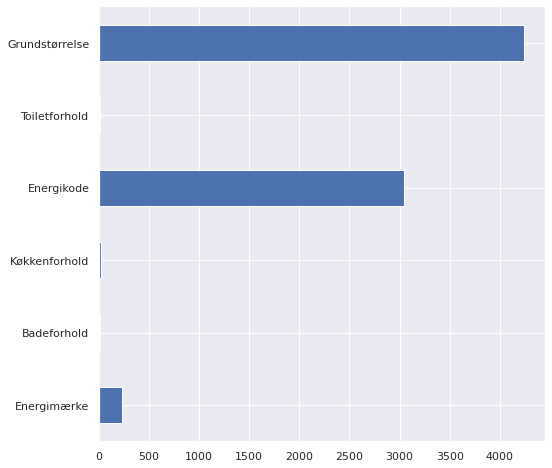

In [5]:
sb.set(font_scale=1)
data_null = data.isna().sum()
plt.figure(figsize=(8,8))
data_null[data_null!=0].plot(kind='barh');

In [6]:
# Theese colums will be dropped because of missing values
data.drop(['Energikode','Grundstørrelse'], 'columns', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4553 entries, 19 to 38531
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Adresse                      4553 non-null   object 
 1   Year build                   4553 non-null   object 
 2   Pris                         4553 non-null   object 
 3   Energimærke                  4320 non-null   object 
 4   Ejerudgift                   4553 non-null   object 
 5   Boligtype                    4553 non-null   object 
 6   Enhedsareal                  4553 non-null   object 
 7   Værelser                     4553 non-null   float64
 8   Antal toiletter              4553 non-null   float64
 9   Badeforhold                  4539 non-null   object 
 10  Antal badeværelser           4553 non-null   float64
 11  Køkkenforhold                4537 non-null   object 
 12  Toiletforhold                4538 non-null   object 
 13  Ydervæg         

In [8]:
# Converts the adress to zipcodes and to int
data['Adresse'] = data['Adresse'].str.extract(r'(\d{4})').astype('int')
# Building year to int
data['Year build'] = data['Year build'].astype('int')
# Ejerudgift to float
data['Ejerudgift'] = data['Ejerudgift'].astype('float')
# Enhedsareal to float
data['Enhedsareal'] = data['Enhedsareal'].astype('float')
# Price to float
data['Pris'] = data['Pris'].astype('float')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4553 entries, 19 to 38531
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Adresse                      4553 non-null   int64  
 1   Year build                   4553 non-null   int64  
 2   Pris                         4553 non-null   float64
 3   Energimærke                  4320 non-null   object 
 4   Ejerudgift                   4553 non-null   float64
 5   Boligtype                    4553 non-null   object 
 6   Enhedsareal                  4553 non-null   float64
 7   Værelser                     4553 non-null   float64
 8   Antal toiletter              4553 non-null   float64
 9   Badeforhold                  4539 non-null   object 
 10  Antal badeværelser           4553 non-null   float64
 11  Køkkenforhold                4537 non-null   object 
 12  Toiletforhold                4538 non-null   object 
 13  Ydervæg         

In [10]:
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Adresse,Year build,Pris,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Seneste ombygning,Udhus,Boligenhed med eget køkken,Boligenhed uden eget køkken,Ejendomsværdiskat,Grundskyld
count,4553.000000,4553.000000,4.553000e+03,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.00000,4553.000000,4553.00000,4553.000000,4553.000000,4553.000000,4553.00000
mean,4790.723479,1946.112453,3.226097e+06,3250.957171,97.184933,3.017132,1.161871,1.084120,4.50011,463.010103,0.88557,39.687898,0.141006,9089.634527,4556.22886
std,2783.294915,139.917913,2.578562e+06,1633.481511,69.380450,1.354925,0.542909,0.342116,3.59940,841.155501,12.70800,55.824877,1.343430,8352.716300,5448.32940
min,1001.000000,0.000000,7.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
10%,2000.000000,1898.000000,9.850000e+05,1647.000000,52.000000,2.000000,1.000000,1.000000,2.00000,0.000000,0.00000,3.000000,0.000000,0.000000,0.00000
25%,2450.000000,1925.000000,1.595000e+06,2176.000000,66.000000,2.000000,1.000000,1.000000,2.00000,0.000000,0.00000,7.000000,0.000000,4600.000000,1394.00000
50%,3400.000000,1961.000000,2.448000e+06,2902.000000,87.000000,3.000000,1.000000,1.000000,4.00000,0.000000,0.00000,20.000000,0.000000,7350.000000,3036.00000
75%,8000.000000,2002.000000,3.998000e+06,3950.000000,113.000000,4.000000,1.000000,1.000000,5.00000,0.000000,0.00000,48.000000,0.000000,12075.000000,5706.00000
90%,9000.000000,2019.000000,6.495000e+06,5118.000000,145.000000,4.000000,2.000000,1.000000,8.00000,1995.000000,0.00000,100.000000,0.000000,18375.000000,10792.00000
max,9990.000000,2022.000000,2.850000e+07,21833.000000,1392.000000,20.000000,11.000000,4.000000,30.00000,2020.000000,628.00000,476.000000,35.000000,125050.000000,70662.00000


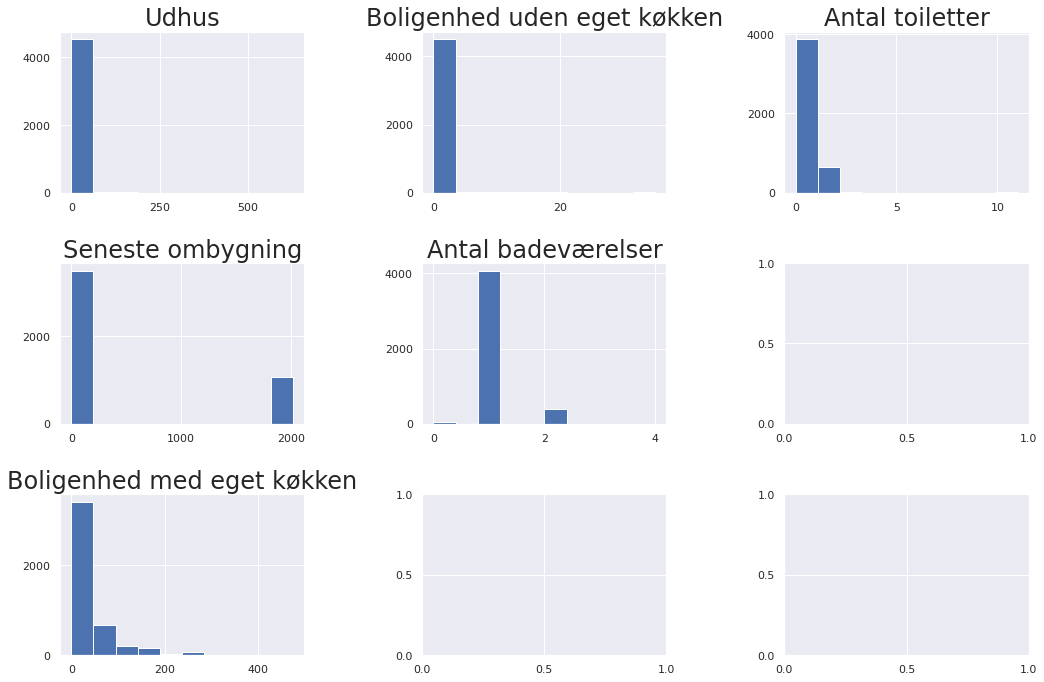

In [11]:

#pick out features, which have one dominant value in the whole sample
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
sb.set(font_scale=2)

data['Udhus'].hist(ax=axes[0,0])
axes[0,0].set_title('Udhus')

data['Boligenhed uden eget køkken'].hist(ax=axes[0,1])
axes[0,1].set_title('Boligenhed uden eget køkken')

data['Antal toiletter'].hist(ax=axes[0,2])
axes[0,2].set_title('Antal toiletter')

data['Seneste ombygning'].hist(ax=axes[1,0])
axes[1,0].set_title('Seneste ombygning')

data['Antal badeværelser'].hist(ax=axes[1,1])
axes[1,1].set_title('Antal badeværelser')
plt.tight_layout()

data['Boligenhed med eget køkken'].hist(ax=axes[2,0])
axes[2,0].set_title('Boligenhed med eget køkken')
plt.tight_layout()

# drop features
data.drop([
   'Boligenhed uden eget køkken'
], 'columns', inplace=True)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4553 entries, 19 to 38531
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Adresse                     4553 non-null   int64  
 1   Year build                  4553 non-null   int64  
 2   Pris                        4553 non-null   float64
 3   Energimærke                 4320 non-null   object 
 4   Ejerudgift                  4553 non-null   float64
 5   Boligtype                   4553 non-null   object 
 6   Enhedsareal                 4553 non-null   float64
 7   Værelser                    4553 non-null   float64
 8   Antal toiletter             4553 non-null   float64
 9   Badeforhold                 4539 non-null   object 
 10  Antal badeværelser          4553 non-null   float64
 11  Køkkenforhold               4537 non-null   object 
 12  Toiletforhold               4538 non-null   object 
 13  Ydervæg                     455

In [13]:
# Energimærke
data.Energimærke.unique()

array(['B', 'E', 'C', 'D', 'A15', 'A10', 'F', 'G', nan, 'A20', '0', 'A',
       'A2', 'A1'], dtype=object)

In [14]:

pd.set_option('display.max_columns', 40)
data.describe(include='all')

,Adresse,Year build,Pris,Energimærke,Ejerudgift,Boligtype,Enhedsareal,Værelser,Antal toiletter,Badeforhold,Antal badeværelser,Køkkenforhold,Toiletforhold,Ydervæg,Tag,Etager,Seneste ombygning,Udhus,Boligenhed med eget køkken,Varmeinstallation,Ejendomsværdiskat,Grundskyld
count,4553.000000,4553.000000,4.553000e+03,4320,4553.000000,4553,4553.000000,4553.000000,4553.000000,4539,4553.000000,4537,4538,4553,4553,4553.00000,4553.000000,4553.00000,4553.000000,4553,4553.000000,4553.00000
unique,NaN,NaN,NaN,13,NaN,5,NaN,NaN,NaN,3,NaN,4,3,11,12,NaN,NaN,NaN,NaN,9,NaN,NaN
top,NaN,NaN,NaN,D,NaN,Egentlig beboelseslejlighed boligenhed med ege...,NaN,NaN,NaN,Badeværelse i enheden,NaN,Eget køkken med afløb,Vandskyllende toilet i enheden,Mursten,Tegl,NaN,NaN,NaN,NaN,Fjernvarme blokvarme,NaN,NaN
freq,NaN,NaN,NaN,1466,NaN,4425,NaN,NaN,NaN,4493,NaN,4508,4528,3673,1378,NaN,NaN,NaN,NaN,3991,NaN,NaN
mean,4790.723479,1946.112453,3.226097e+06,NaN,3250.957171,NaN,97.184933,3.017132,1.161871,NaN,1.084120,NaN,NaN,NaN,NaN,4.50011,463.010103,0.88557,39.687898,NaN,9089.634527,4556.22886
std,2783.294915,139.917913,2.578562e+06,NaN,1633.481511,NaN,69.380450,1.354925,0.542909,NaN,0.342116,NaN,NaN,NaN,NaN,3.59940,841.155501,12.70800,55.824877,NaN,8352.716300,5448.32940
min,1001.000000,0.000000,7.000000e+04,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.00000,0.000000,0.00000,0.000000,NaN,0.000000,0.00000
25%,2450.000000,1925.000000,1.595000e+06,NaN,2176.000000,NaN,66.000000,2.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,2.00000,0.000000,0.00000,7.000000,NaN,4600.000000,1394.00000
50%,3400.000000,1961.000000,2.448000e+06,NaN,2902.000000,NaN,87.000000,3.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,4.00000,0.000000,0.00000,20.000000,NaN,7350.000000,3036.00000
75%,8000.000000,2002.000000,3.998000e+06,NaN,3950.000000,NaN,113.000000,4.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,5.00000,0.000000,0.00000,48.000000,NaN,12075.000000,5706.00000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  if sys.path[0] == '':


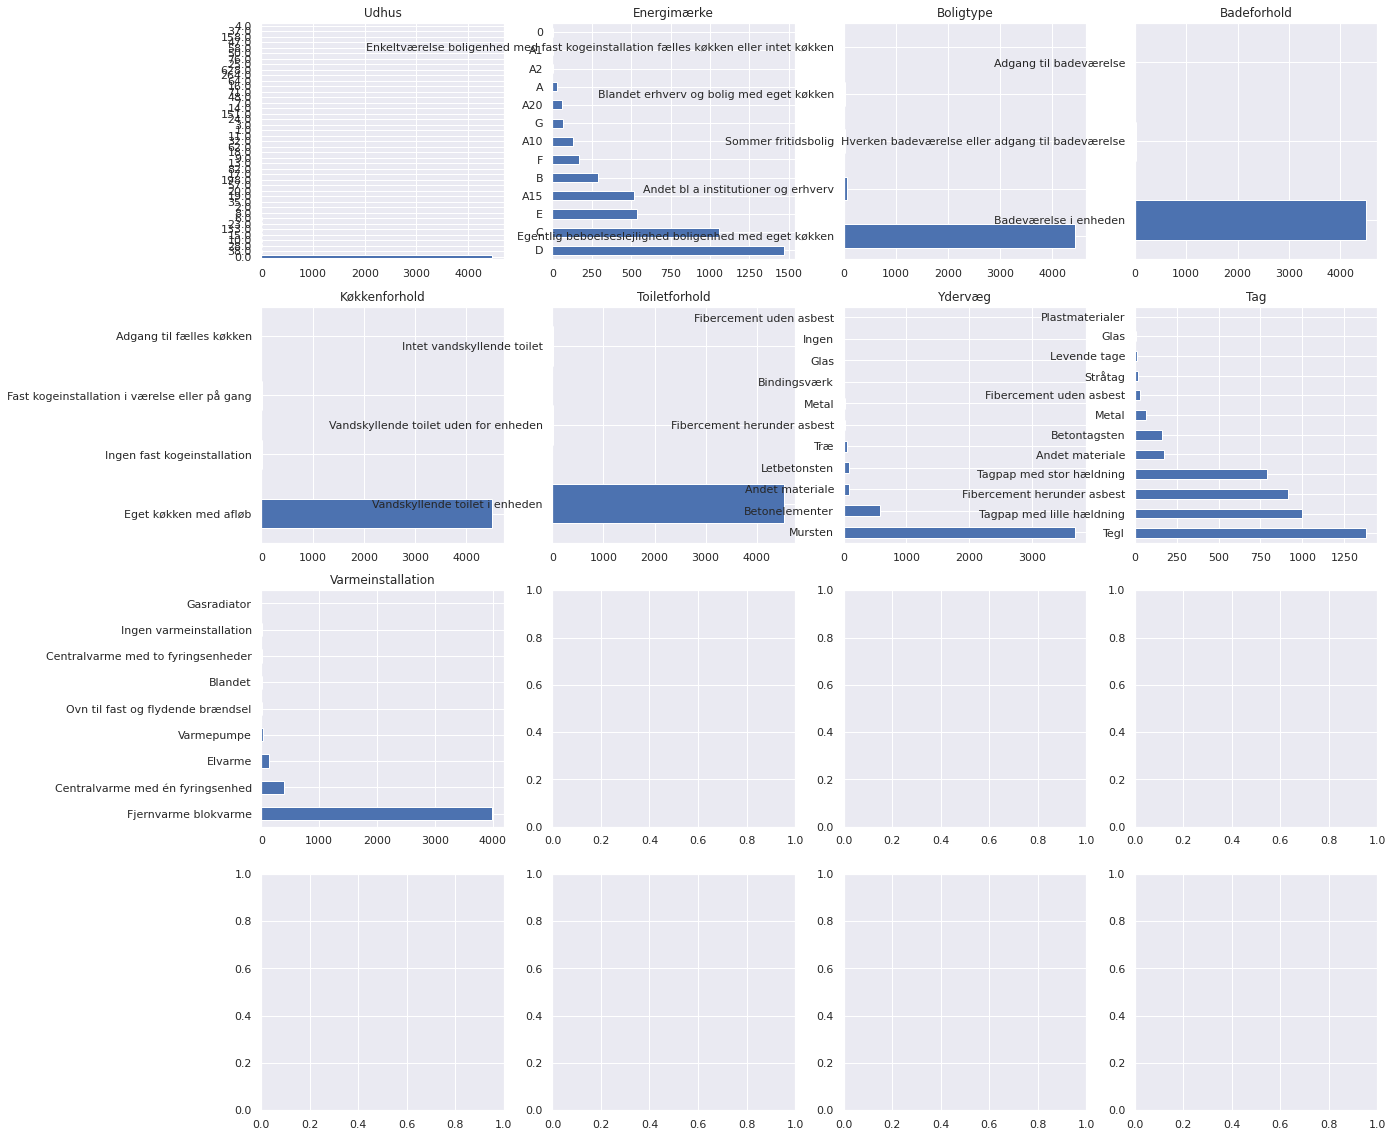

In [15]:
sb.set()
lst_out = ['Udhus','Energimærke', 'Boligtype',
           'Badeforhold', 'Køkkenforhold','Toiletforhold',
           'Ydervæg', 'Tag', 'Varmeinstallation']
sb.set(font_scale=1)
n_row = 4
n_col = 4
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
for i in enumerate(lst_out):
    pd.value_counts(data[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()


# drop 
data.drop([
    'Boligtype',
    'Badeforhold',
    'Køkkenforhold',
    'Udhus',
    'Toiletforhold'
], 'columns', inplace=True)

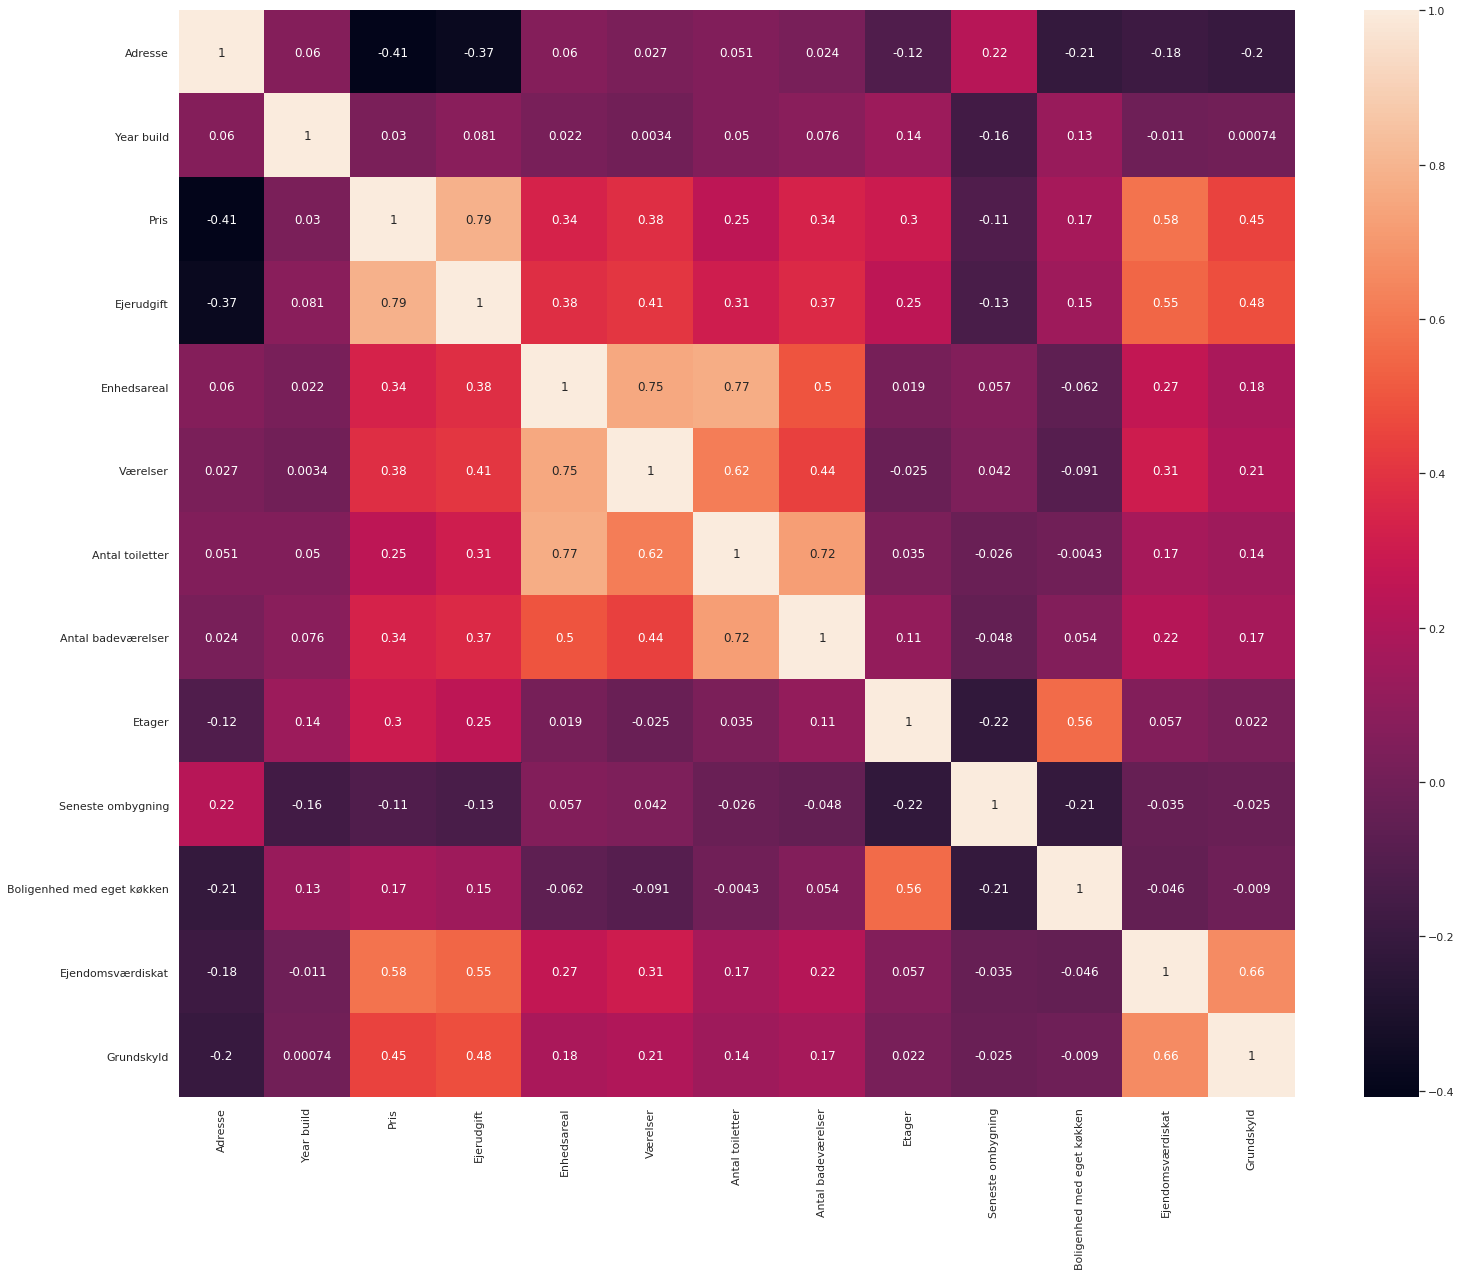

In [16]:
plt.figure(figsize=(25,20))
sb.set(font_scale=1)
sb.heatmap(data.corr(),annot=True);

In [17]:
#find ud af hvad der skal droppes ---> 

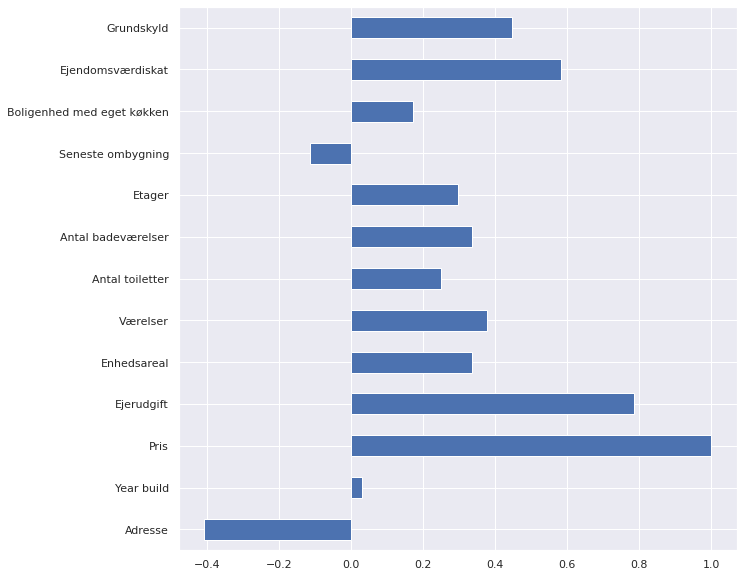

In [18]:
plt.figure(figsize=(10,10))
data.corr()['Pris'].plot(kind='barh');

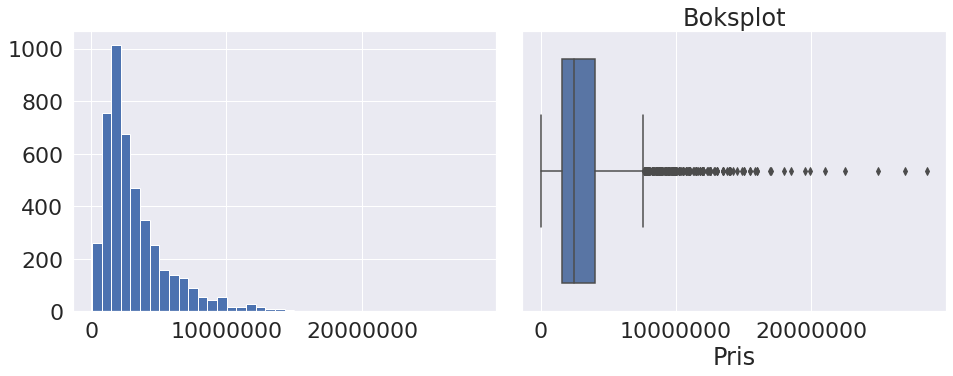

In [19]:

fig = plt.figure(figsize=(20,10))
sb.set(font_scale=2)
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('')
ax1.ticklabel_format(style='plain')
data['Pris'].hist(bins=40);

ax2 = fig.add_subplot(2,3,2)
ax2.set_title('Boksplot')
ax2.ticklabel_format(style='plain')
sb.boxplot(x=data['Pris'])
plt.tight_layout()

In [20]:
# dropping the "abnormal" high prices
print(pd.value_counts(data['Pris']<9500000))
data = data[data['Pris']<95000000]

data.head()

True     4403
False     150
Name: Pris, dtype: int64


,Adresse,Year build,Pris,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Etager,Seneste ombygning,Boligenhed med eget køkken,Varmeinstallation,Ejendomsværdiskat,Grundskyld
19,6094,1902,485000.0,B,2863.0,0.0,0.0,0.0,0.0,Mursten,Tegl,3.0,1992.0,2.0,Centralvarme med én fyringsenhed,0.0,0.0
33,8230,1970,699000.0,E,1302.0,27.0,1.0,1.0,1.0,Mursten,Tagpap med lille hældning,3.0,0.0,30.0,Fjernvarme blokvarme,3100.0,1524.0
48,4160,1974,995000.0,C,1980.0,108.0,4.0,2.0,1.0,Betonelementer,Tagpap med lille hældning,2.0,0.0,1.0,Centralvarme med én fyringsenhed,5355.0,5373.0
61,4200,1971,1125000.0,C,2732.0,107.0,3.0,1.0,1.0,Mursten,Tagpap med lille hældning,4.0,0.0,48.0,Fjernvarme blokvarme,6300.0,3352.0
64,9400,1967,1148000.0,C,2176.0,83.0,3.0,1.0,1.0,Mursten,Tagpap med stor hældning,4.0,1994.0,96.0,Fjernvarme blokvarme,5900.0,2302.0


In [21]:
numeric = set(data.corr()['Pris'].index)
cat = list(set(data.columns) - set(data.corr()['Pris'].index))

In [22]:
numeric

{'Adresse',
 'Antal badeværelser',
 'Antal toiletter',
 'Boligenhed med eget køkken',
 'Ejendomsværdiskat',
 'Ejerudgift',
 'Enhedsareal',
 'Etager',
 'Grundskyld',
 'Pris',
 'Seneste ombygning',
 'Værelser',
 'Year build'}

In [23]:
cat

['Energimærke', 'Varmeinstallation', 'Tag', 'Ydervæg']

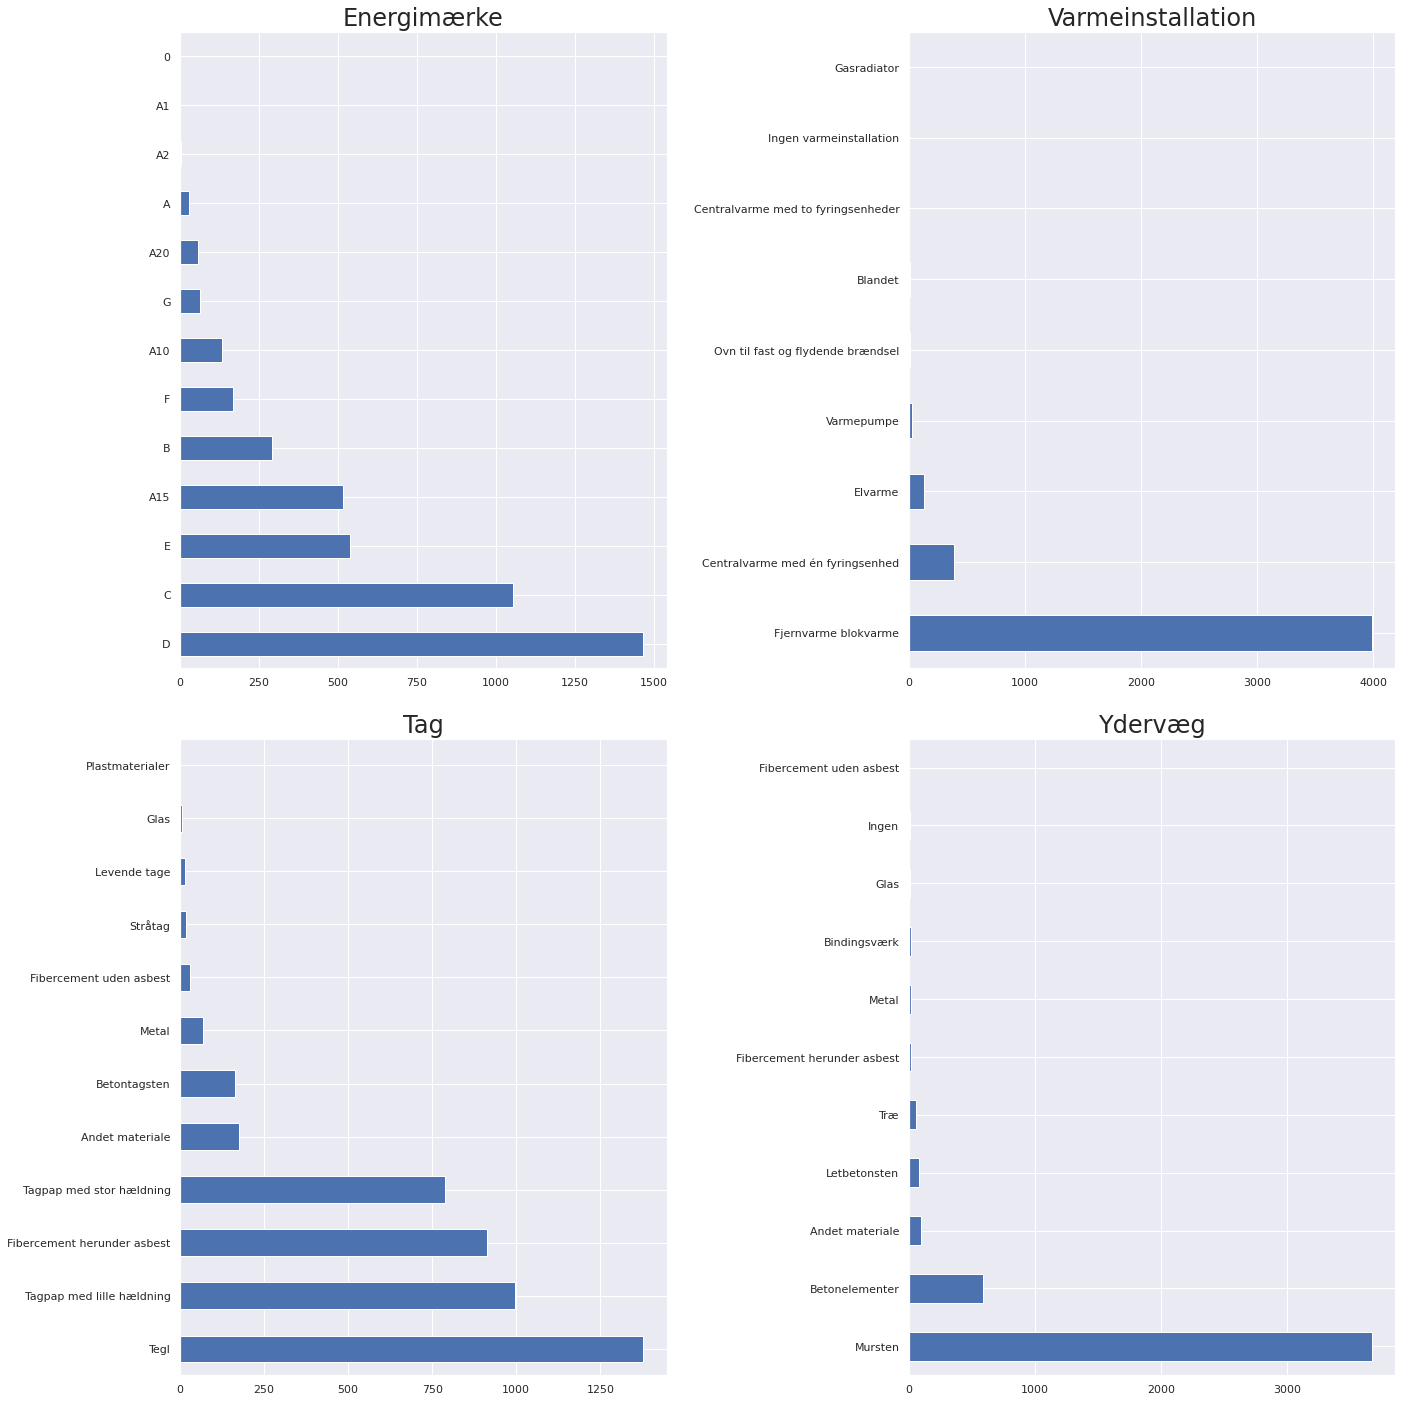

In [24]:
sb.set()
n_row = 2
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
sb.set(font_scale=2)
for i in enumerate(cat):
    pd.value_counts(data[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

In [25]:

# bring categories into a numerical format:
for i in cat:
    data[i] = data[i].factorize()[0]
data.head()

,Adresse,Year build,Pris,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Etager,Seneste ombygning,Boligenhed med eget køkken,Varmeinstallation,Ejendomsværdiskat,Grundskyld
19,6094,1902,485000.0,0,2863.0,0.0,0.0,0.0,0.0,0,0,3.0,1992.0,2.0,0,0.0,0.0
33,8230,1970,699000.0,1,1302.0,27.0,1.0,1.0,1.0,0,1,3.0,0.0,30.0,1,3100.0,1524.0
48,4160,1974,995000.0,2,1980.0,108.0,4.0,2.0,1.0,1,1,2.0,0.0,1.0,0,5355.0,5373.0
61,4200,1971,1125000.0,2,2732.0,107.0,3.0,1.0,1.0,0,1,4.0,0.0,48.0,1,6300.0,3352.0
64,9400,1967,1148000.0,2,2176.0,83.0,3.0,1.0,1.0,0,2,4.0,1994.0,96.0,1,5900.0,2302.0


In [26]:
y = data['Pris']
X = data[['Adresse', 'Year build', 'Energimærke', 'Ejerudgift', 'Enhedsareal', 'Værelser', 'Antal toiletter', 'Antal badeværelser',
          'Ydervæg', 'Tag', 'Etager', 'Seneste ombygning','Varmeinstallation','Ejendomsværdiskat','Grundskyld','Boligenhed med eget køkken']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [27]:
print(coeff_df)

                              Coefficient
Adresse                       -151.144585
Year build                    -213.539334
Energimærke                  40670.025151
Ejerudgift                     786.566272
Enhedsareal                   2997.861834
Værelser                    201104.998976
Antal toiletter            -830797.699127
Antal badeværelser          947854.116522
Ydervæg                     -86416.244836
Tag                         -42047.908611
Etager                      103423.070521
Seneste ombygning               64.599280
Varmeinstallation            72081.356877
Ejendomsværdiskat               66.483785
Grundskyld                      -5.020017
Boligenhed med eget køkken    -156.891594


In [28]:
print('Training Score : Goal is 0,7')
print(lm.score(X_train, y_train))

Training Score : Goal is 0,7
0.6953965098014314


In [29]:
print('Test Score : Goal is 0,7')
print(lm.score(X_test, y_test))

Test Score : Goal is 0,7
0.7041124712191121


In [30]:
predictions = lm.predict(X_test)

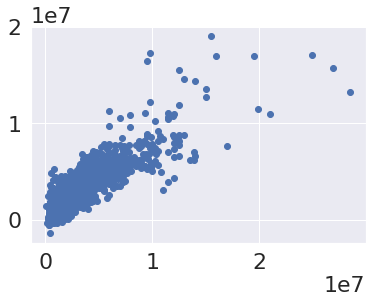

In [31]:
plt.scatter(y_test, predictions)

In [32]:
sb.displot((y_test-predictions), bins=50)

AttributeError: module 'seaborn' has no attribute 'displot'